In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import os
import warnings
import math
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from sklearn.metrics import mean_squared_error, mean_absolute_error
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split 
from sklearn import linear_model
from sklearn.metrics import recall_score, precision_score, classification_report,accuracy_score,confusion_matrix, roc_curve, auc, roc_curve,accuracy_score,plot_confusion_matrix
from sklearn.preprocessing import StandardScaler, normalize
from scipy import ndimage
import seaborn as sns

In [3]:
test_data = pd.read_csv('/Users/iammhaiderkhan/Desktop/Documents/Study stuff/MASS Semester 2/Computational Astrobiology/archive/exoTest.csv').fillna(0)
train_data = pd.read_csv('/Users/iammhaiderkhan/Desktop/Documents/Study stuff/MASS Semester 2/Computational Astrobiology/archive/exoTrain.csv').fillna(0)

In [4]:
categ = {2: 1,1: 0}
train_data.LABEL = [categ[item] for item in train_data.LABEL]
test_data.LABEL = [categ[item] for item in test_data.LABEL]

In [5]:
train_data['LABEL'].value_counts()


0    5050
1      37
Name: LABEL, dtype: int64

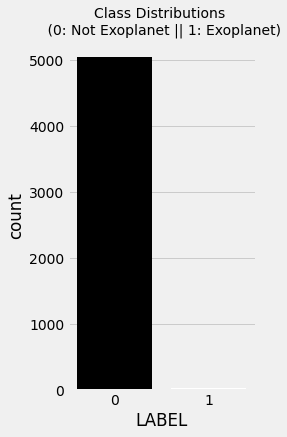

In [6]:
#Visualization:
plt.figure(figsize=(3,6))
colors = ["0", "1"]
sns.countplot('LABEL', data=train_data, palette=colors)
plt.title('Class Distributions \n (0: Not Exoplanet || 1: Exoplanet)', fontsize=14)
print()

<AxesSubplot:>

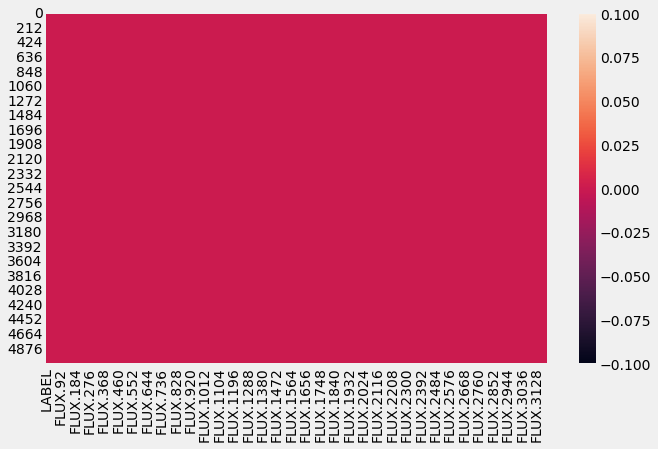

In [7]:
sns.heatmap(train_data.isnull())

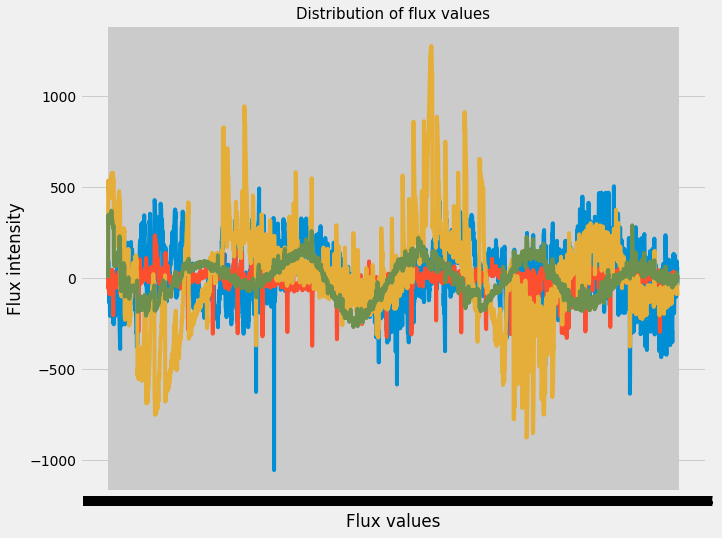

In [9]:
plt.figure(figsize=(10,8))
plt.title('Distribution of flux values', fontsize=15)
plt.xlabel('Flux values')
plt.ylabel('Flux intensity')
plt.plot(train_data.iloc[0,])
plt.plot(train_data.iloc[1,])
plt.plot(train_data.iloc[2,])
plt.plot(train_data.iloc[3,])
plt.show()

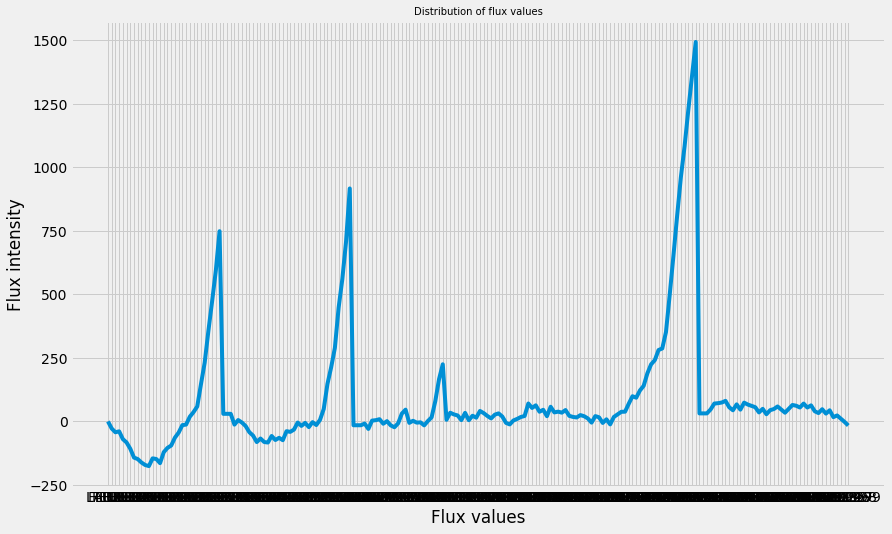

In [8]:
rcParams['figure.figsize'] = 13, 8
plt.title('Distribution of flux values', fontsize=10)
plt.xlabel('Flux values')
plt.ylabel('Flux intensity')
# plt.plot(train_data.iloc[0,])
plt.plot(train_data.iloc[300,0:200])

plt.show()

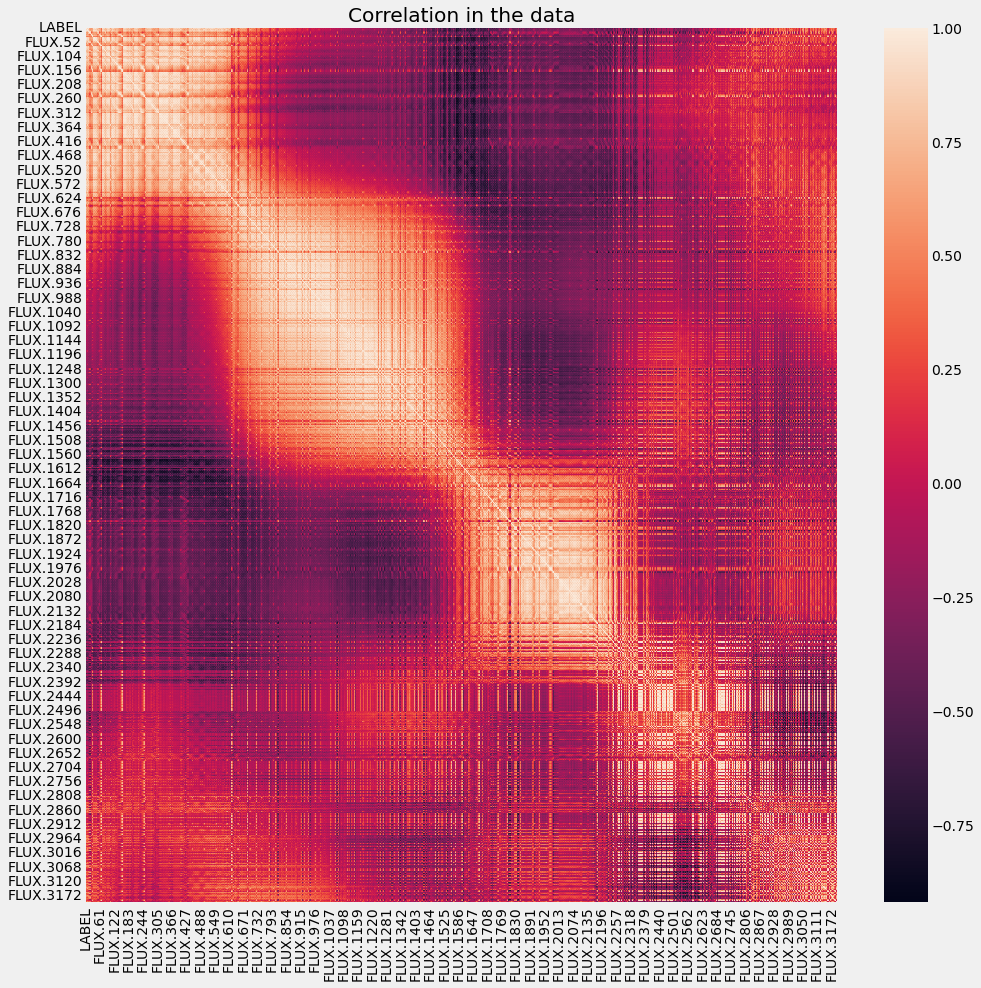

In [10]:
plt.figure(figsize=(15,15))
sns.heatmap(train_data.corr())
plt.title('Correlation in the data')
plt.show()


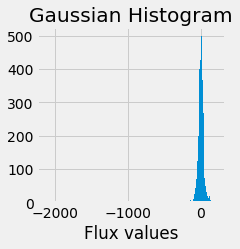

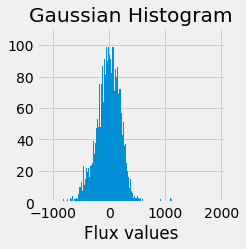

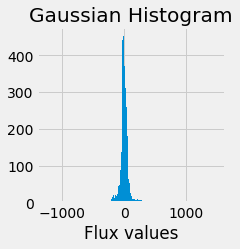

In [12]:
labels_1=[100,200,300]
for i in labels_1:
    plt.figure(figsize=(3,3))
    plt.hist(train_data.iloc[i,:], bins=200)
    plt.title("Gaussian Histogram")
    plt.xlabel("Flux values")
    plt.show()

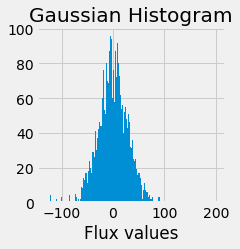

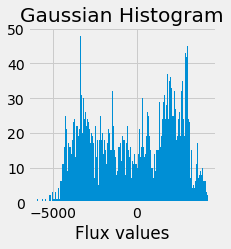

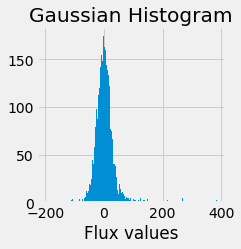

In [13]:
labels_1=[16,21,25]
for i in labels_1:
    plt.figure(figsize=(3,3))
    plt.hist(train_data.iloc[i,:], bins=200)
    plt.title("Gaussian Histogram")
    plt.xlabel("Flux values")
    plt.show()

<AxesSubplot:xlabel='LABEL', ylabel='FLUX.5'>

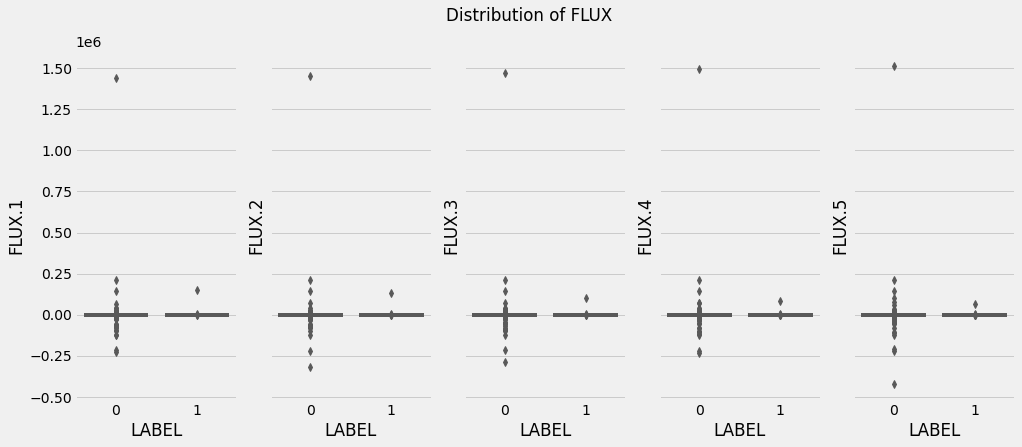

In [14]:
fig, axes = plt.subplots(1, 5,figsize=(15, 6), sharey=True)
fig.suptitle('Distribution of FLUX')

sns.boxplot(ax=axes[0], data=train_data, x='LABEL', y='FLUX.1',palette="Set2")
sns.boxplot(ax=axes[1], data=train_data, x='LABEL', y='FLUX.2',palette="Set2")
sns.boxplot(ax=axes[2], data=train_data, x='LABEL', y='FLUX.3',palette="Set2")
sns.boxplot(ax=axes[3], data=train_data, x='LABEL', y='FLUX.4',palette="Set2")
sns.boxplot(ax=axes[4], data=train_data, x='LABEL', y='FLUX.5',palette="Set2")

In [15]:
print('Dropping Outliers')
train_data.drop(train_data[train_data['FLUX.1']>250000].index, axis=0, inplace=True)

Dropping Outliers


<AxesSubplot:xlabel='LABEL', ylabel='FLUX.5'>

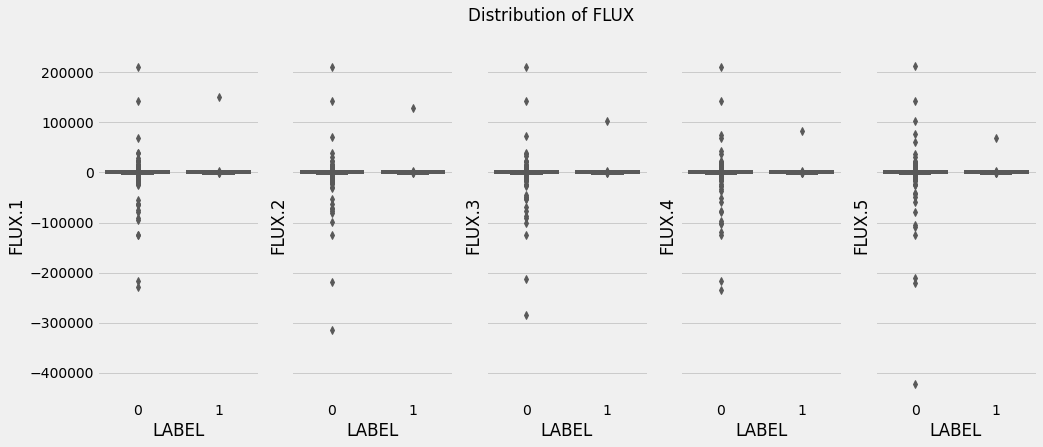

In [16]:
fig, axes = plt.subplots(1, 5,figsize=(15, 6), sharey=True)
fig.suptitle('Distribution of FLUX')

sns.boxplot(ax=axes[0], data=train_data, x='LABEL', y='FLUX.1',palette="Set2")
sns.boxplot(ax=axes[1], data=train_data, x='LABEL', y='FLUX.2',palette="Set2")
sns.boxplot(ax=axes[2], data=train_data, x='LABEL', y='FLUX.3',palette="Set2")
sns.boxplot(ax=axes[3], data=train_data, x='LABEL', y='FLUX.4',palette="Set2")
sns.boxplot(ax=axes[4], data=train_data, x='LABEL', y='FLUX.5',palette="Set2")

In [17]:
x_train = train_data.drop(["LABEL"],axis=1)
y_train = train_data["LABEL"]   
x_test = test_data.drop(["LABEL"],axis=1)
y_test = test_data["LABEL"]


In [18]:
x_train = normalized = normalize(x_train)
x_test = normalize(x_test)

In [19]:
x_train = filtered = ndimage.filters.gaussian_filter(x_train, sigma=10)
x_test = ndimage.filters.gaussian_filter(x_test, sigma=10)

In [20]:
std_scaler = StandardScaler()
x_train = scaled = std_scaler.fit_transform(x_train)
x_test = std_scaler.fit_transform(x_test)

Validation accuracy of KNN is 0.9912280701754386

Classification report :
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       565
           1       0.00      0.00      0.00         5

    accuracy                           0.99       570
   macro avg       0.50      0.50      0.50       570
weighted avg       0.98      0.99      0.99       570



Text(0.5, 1.0, 'ROC - CURVE & AREA UNDER CURVE')

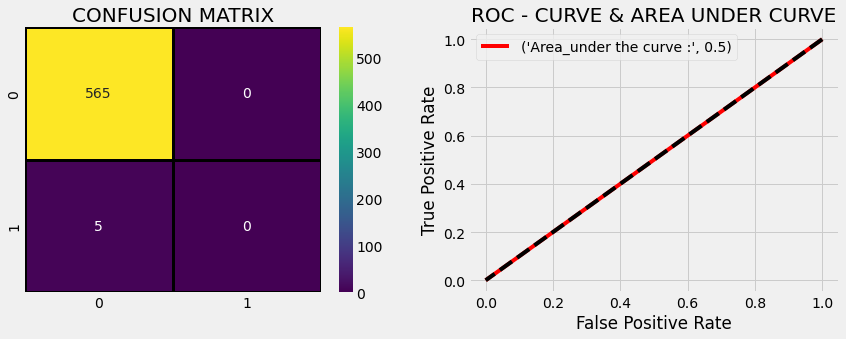

In [21]:
#K-NN
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()

knn_model.fit(x_train,y_train)
prediction=knn_model.predict(x_test)
print('Validation accuracy of KNN is', accuracy_score(prediction,y_test))
print ("\nClassification report :\n",(classification_report(y_test,prediction)))

#Confusion matrix
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test,prediction),annot=True,cmap="viridis",fmt = "d",linecolor="k",linewidths=3)
plt.title("CONFUSION MATRIX",fontsize=20)

#ROC curve and Area under the curve plotting
predicting_probabilites = knn_model.predict_proba(x_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,predicting_probabilites)
plt.subplot(222)
plt.plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "r")
plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
plt.legend(loc = "best")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)

Validation accuracy of Logistic Regression is 0.9859649122807017

Classification report :
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       565
           1       0.00      0.00      0.00         5

    accuracy                           0.99       570
   macro avg       0.50      0.50      0.50       570
weighted avg       0.98      0.99      0.98       570



Text(0.5, 1.0, 'ROC - CURVE & AREA UNDER CURVE')

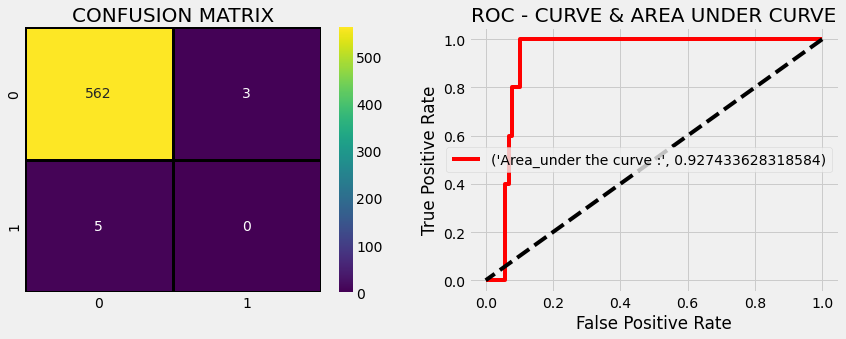

In [22]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(class_weight={0:100, 1:1})

lr_model.fit(x_train,y_train)

prediction=lr_model.predict(x_test)

print('Validation accuracy of Logistic Regression is', accuracy_score(prediction,y_test))
print ("\nClassification report :\n",(classification_report(y_test,prediction)))

#Confusion matrix
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test,prediction),annot=True,cmap="viridis",fmt = "d",linecolor="k",linewidths=3)
plt.title("CONFUSION MATRIX",fontsize=20)

#ROC curve and Area under the curve plotting
predicting_probabilites = lr_model.predict_proba(x_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,predicting_probabilites)
plt.subplot(222)
plt.plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "r")
plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
plt.legend(loc = "best")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)

Validation accuracy of Decision Tree is 0.9614035087719298

Classification report :
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       565
           1       0.00      0.00      0.00         5

    accuracy                           0.96       570
   macro avg       0.50      0.48      0.49       570
weighted avg       0.98      0.96      0.97       570



Text(0.5, 1.0, 'ROC - CURVE & AREA UNDER CURVE')

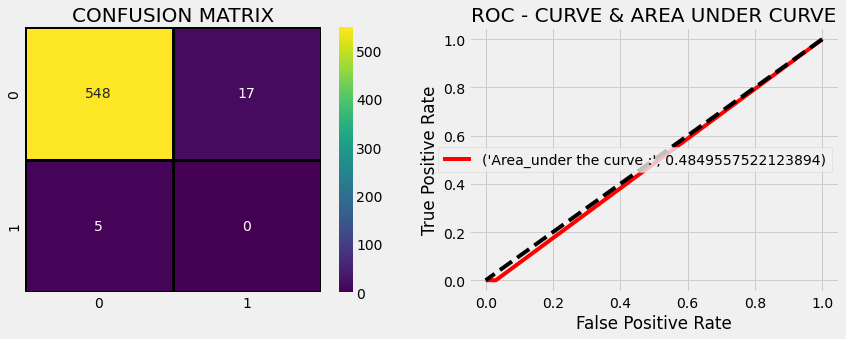

In [23]:

#Decision Tree
from sklearn.tree import DecisionTreeClassifier
ds_model = DecisionTreeClassifier(max_depth=5, random_state=13)

ds_model.fit(x_train,y_train)

prediction=ds_model.predict(x_test)

print('Validation accuracy of Decision Tree is', accuracy_score(prediction,y_test))
print ("\nClassification report :\n",(classification_report(y_test,prediction)))

#Confusion matrix
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test,prediction),annot=True,cmap="viridis",fmt = "d",linecolor="k",linewidths=3)
plt.title("CONFUSION MATRIX",fontsize=20)

#ROC curve and Area under the curve plotting
predicting_probabilites = ds_model.predict_proba(x_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,predicting_probabilites)
plt.subplot(222)
plt.plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "r")
plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
plt.legend(loc = "best")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)

<AxesSubplot:xlabel='index'>

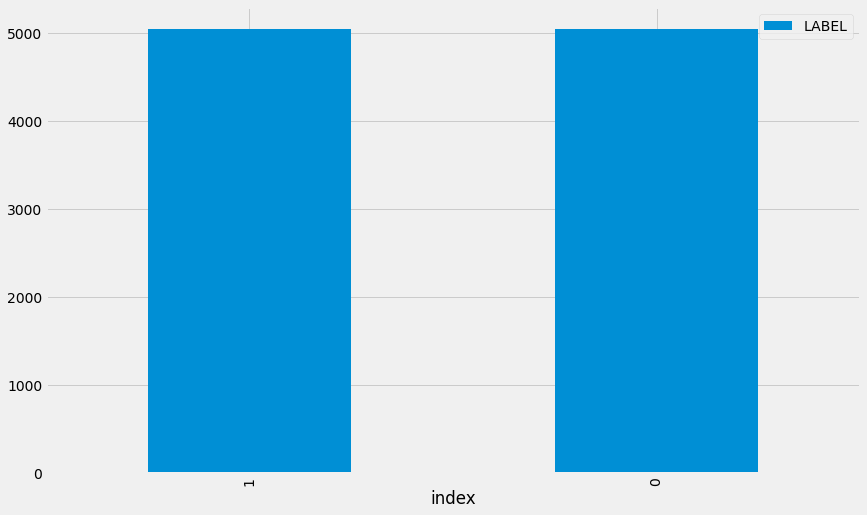

In [25]:
from imblearn.over_sampling import SMOTE
model = SMOTE()
ov_train_x,ov_train_y = model.fit_resample(train_data.drop('LABEL',axis=1), train_data['LABEL'])
ov_train_y = ov_train_y.astype('int')

ov_train_y.value_counts().reset_index().plot(kind='bar', x='index', y='LABEL')

In [26]:
train_X, test_X, train_y, test_y = train_test_split(ov_train_x, ov_train_y, test_size=0.33, random_state=42)

Validation accuracy of Decision Tree is 0.9297929792979298

Classification report :
               precision    recall  f1-score   support

           0       0.96      0.90      0.93      1709
           1       0.90      0.96      0.93      1624

    accuracy                           0.93      3333
   macro avg       0.93      0.93      0.93      3333
weighted avg       0.93      0.93      0.93      3333



Text(0.5, 1.0, 'ROC - CURVE & AREA UNDER CURVE')

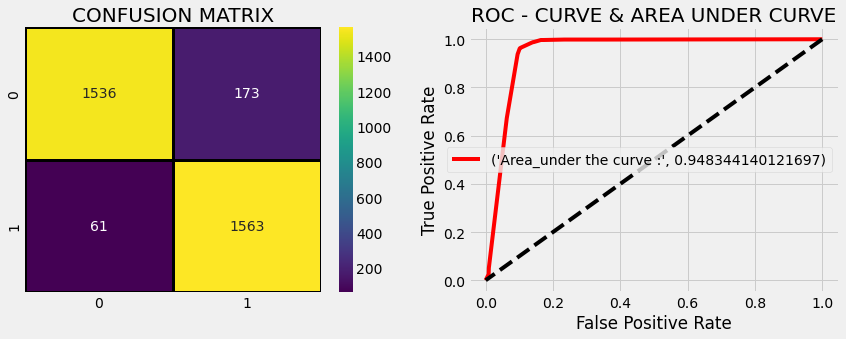

In [27]:
from sklearn.tree import DecisionTreeClassifier
ds_model = DecisionTreeClassifier(max_depth=5, random_state=13)

ds_model.fit(train_X,train_y)

prediction=ds_model.predict(test_X)

print('Validation accuracy of Decision Tree is', accuracy_score(prediction,test_y))
print ("\nClassification report :\n",(classification_report(test_y,prediction)))

#Confusion matrix
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(test_y,prediction),annot=True,cmap="viridis",fmt = "d",linecolor="k",linewidths=3)
plt.title("CONFUSION MATRIX",fontsize=20)

#ROC curve and Area under the curve plotting
predicting_probabilites = ds_model.predict_proba(test_X)[:,1]
fpr,tpr,thresholds = roc_curve(test_y,predicting_probabilites)
plt.subplot(222)
plt.plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "r")
plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
plt.legend(loc = "best")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)

Validation accuracy of KNN is 0.9816981698169817

Classification report :
               precision    recall  f1-score   support

           0       1.00      0.96      0.98      1709
           1       0.96      1.00      0.98      1624

    accuracy                           0.98      3333
   macro avg       0.98      0.98      0.98      3333
weighted avg       0.98      0.98      0.98      3333



Text(0.5, 1.0, 'ROC - CURVE & AREA UNDER CURVE')

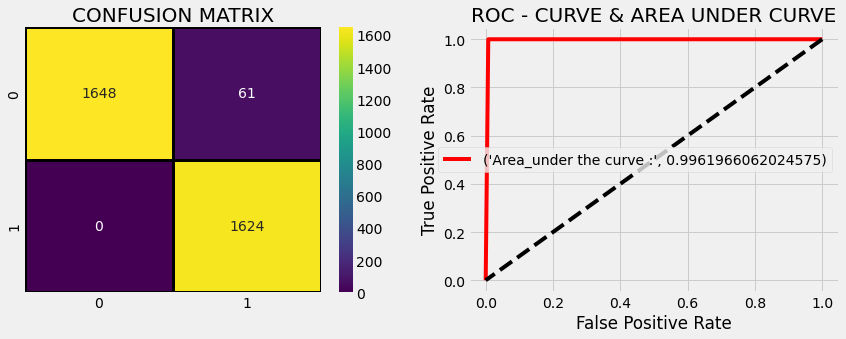

In [28]:
knn_model = KNeighborsClassifier()

knn_model.fit(train_X,train_y)

prediction=knn_model.predict(test_X)

print('Validation accuracy of KNN is', accuracy_score(prediction,test_y))
print ("\nClassification report :\n",(classification_report(test_y,prediction)))

#Confusion matrix
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(test_y,prediction),annot=True,cmap="viridis",fmt = "d",linecolor="k",linewidths=3)
plt.title("CONFUSION MATRIX",fontsize=20)

#ROC curve and Area under the curve plotting
predicting_probabilites = knn_model.predict_proba(test_X)[:,1]
fpr,tpr,thresholds = roc_curve(test_y,predicting_probabilites)
plt.subplot(222)
plt.plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "r")
plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
plt.legend(loc = "best")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)

Validation accuracy of Logistic Regression is 0.7047704770477048

Classification report :
               precision    recall  f1-score   support

           0       0.73      0.67      0.70      1709
           1       0.68      0.74      0.71      1624

    accuracy                           0.70      3333
   macro avg       0.71      0.71      0.70      3333
weighted avg       0.71      0.70      0.70      3333



Text(0.5, 1.0, 'ROC - CURVE & AREA UNDER CURVE')

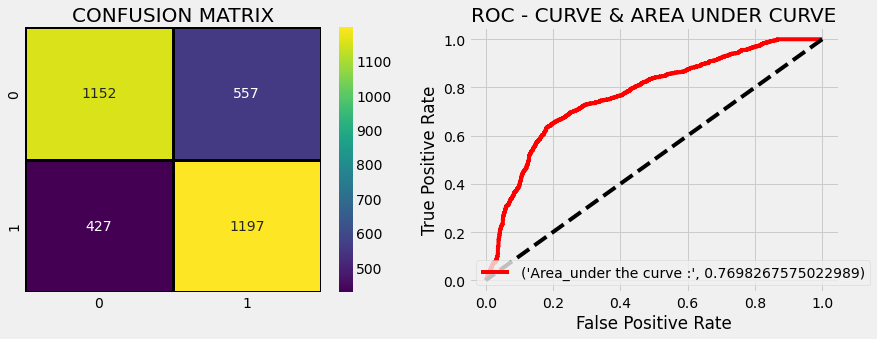

In [29]:
lr_model = LogisticRegression(class_weight={0:100, 1:1})

lr_model.fit(train_X,train_y)

prediction=lr_model.predict(test_X)

print('Validation accuracy of Logistic Regression is', accuracy_score(prediction,test_y))
print ("\nClassification report :\n",(classification_report(test_y,prediction)))

#Confusion matrix
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(test_y,prediction),annot=True,cmap="viridis",fmt = "d",linecolor="k",linewidths=3)
plt.title("CONFUSION MATRIX",fontsize=20)

#ROC curve and Area under the curve plotting
predicting_probabilites = lr_model.predict_proba(test_X)[:,1]
fpr,tpr,thresholds = roc_curve(test_y,predicting_probabilites)
plt.subplot(222)
plt.plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "r")
plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
plt.legend(loc = "best")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)

In [33]:
# Import the necessary libraries
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Load and preprocess data (assuming this is already done in the notebook)

# Split data into features (X) and target (y)
X = train_data.iloc[:, :-1]
y = train_data.iloc[:, -1]

# Ensure the target variable y is categorical if using classifier
if y.dtype == 'float' or y.dtype == 'object':
    y = y.astype(int)


In [34]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose GradientBoostingClassifier or GradientBoostingRegressor based on target type
if len(np.unique(y_train)) > 20:  # Assuming more than 20 unique values implies regression
    model = GradientBoostingRegressor()
    param_grid = {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 4, 5],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    scoring = 'neg_mean_squared_error'
else:
    model = GradientBoostingClassifier()
    param_grid = {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 4, 5],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    scoring = 'accuracy'

In [35]:
# Initialize Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           scoring=scoring, cv=3, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f'Best Parameters: {best_params}')
print(f'Best Score: {best_score}')

Fitting 3 folds for each of 243 candidates, totalling 729 fits
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 7.9min
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 8.0min
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 8.0min
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=15.5min
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=15.6min
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time= 7.7min
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time= 7.7min
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=2

KeyboardInterrupt: 

In [ ]:
# Evaluate the best model on the test data
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

if scoring == 'accuracy':
    best_accuracy = accuracy_score(y_test, y_pred_best)
    best_report = classification_report(y_test, y_pred_best)
    print(f'Best Model Accuracy: {best_accuracy}')
    print(f'Best Model Classification Report:\n{best_report}')
else:
    best_mse = mean_squared_error(y_test, y_pred_best)
    best_r2 = r2_score(y_test, y_pred_best)
    print(f'Best Model Mean Squared Error: {best_mse}')
    print(f'Best Model R^2 Score: {best_r2}')